In [1]:
# # installing world weather online api package 
# #     --> https://www.worldweatheronline.com/developer/api/historical-weather-api.aspx
# !pip install wwo-hist

In [2]:
from wwo_hist import retrieve_hist_data

In [3]:
import env

In [ ]:
# freq = 4
# start_date = '01-JAN-2020'
# end_date = '30-SEP-2022'
# api_key = env.wwo_api_key
# location_list = [f'{env.zip}']

# hist_weather_data = retrieve_hist_data(api_key,
#                                 location_list,
#                                 start_date,
#                                 end_date,
#                                 freq,
#                                 location_label = False,
#                                 export_csv = True,
#                                 store_df = True)

In [9]:
import pandas as pd
df = pd.read_csv(f'data/{env.zip}.csv')
df.iloc[:, :-1].sample(2)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
2377,2020-10-24 03:00:00,27,16,0.0,8.6,6,50,03:31 PM,01:22 AM,07:42 AM,...,17,24,50,64,0.0,1019,17,10,19,19
6041,2022-01-25 03:00:00,23,8,0.0,10.8,5,48,01:40 AM,01:10 PM,08:27 AM,...,6,19,0,89,0.0,1012,8,10,248,9


In [10]:
(df.mintempC * 1.8) + 32

0       41.0
1       41.0
2       41.0
3       41.0
4       41.0
        ... 
8027    66.2
8028    66.2
8029    66.2
8030    66.2
8031    66.2
Name: mintempC, Length: 8032, dtype: float64

In [11]:
(df.maxtempC - df.mintempC).max()

21

In [16]:
df[df.maxtempC - df.mintempC == (df.maxtempC - df.mintempC).max()].sample(2).iloc[:, :-1]

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
6943,2022-05-17 21:00:00,41,20,0.0,11.6,8,89,10:33 PM,07:48 AM,06:40 AM,...,29,42,20,37,0.0,1011,29,10,142,30
7107,2022-06-07 09:00:00,44,23,0.0,11.6,8,53,01:37 PM,02:01 AM,06:33 AM,...,27,25,0,65,0.0,1010,27,10,172,22


In [20]:
df = df.copy().iloc[:, :-1]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8032 entries, 0 to 8031
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          8032 non-null   object 
 1   maxtempC           8032 non-null   int64  
 2   mintempC           8032 non-null   int64  
 3   totalSnow_cm       8032 non-null   float64
 4   sunHour            8032 non-null   float64
 5   uvIndex            8032 non-null   int64  
 6   moon_illumination  8032 non-null   int64  
 7   moonrise           8032 non-null   object 
 8   moonset            8032 non-null   object 
 9   sunrise            8032 non-null   object 
 10  sunset             8032 non-null   object 
 11  DewPointC          8032 non-null   int64  
 12  FeelsLikeC         8032 non-null   int64  
 13  HeatIndexC         8032 non-null   int64  
 14  WindChillC         8032 non-null   int64  
 15  WindGustKmph       8032 non-null   int64  
 16  cloudcover         8032 

In [24]:
df.sample(5).corr()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
maxtempC,1.000000,0.914894,NaN,-0.781755,0.915751,-0.144388,0.993629,0.957878,0.924607,0.934125,0.053639,0.320392,0.584125,0.460069,-0.885863,0.936354,NaN,-0.698644,-0.173254
mintempC,0.914894,1.000000,NaN,-0.802130,0.967235,0.170702,0.908957,0.783150,0.714929,0.726703,-0.096310,0.523902,0.767286,0.445722,-0.779358,0.741331,NaN,-0.564926,-0.388505
totalSnow_cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sunHour,-0.781755,-0.802130,NaN,1.000000,-0.924221,0.064404,-0.718671,-0.671579,-0.623117,-0.650817,-0.048759,0.028298,-0.493149,-0.462421,0.834828,-0.669257,NaN,0.368150,0.345680
uvIndex,0.915751,0.967235,NaN,-0.924221,1.000000,0.035018,0.883852,0.799223,0.739088,0.756498,-0.072759,0.327166,0.659793,0.516047,-0.834847,0.774403,NaN,-0.495750,-0.411873
moon_illumination,-0.144388,0.170702,NaN,0.064404,0.035018,1.000000,-0.091554,-0.403492,-0.485843,-0.469356,0.260946,0.321219,0.716593,-0.587155,0.011369,-0.474711,NaN,-0.206929,0.112651
DewPointC,0.993629,0.908957,NaN,-0.718671,0.883852,-0.091554,1.000000,0.947718,0.913534,0.921424,0.088353,0.369442,0.624602,0.395247,-0.873024,0.919755,NaN,-0.752478,-0.114903
FeelsLikeC,0.957878,0.783150,NaN,-0.671579,0.799223,-0.403492,0.947718,1.000000,0.994646,0.995631,-0.023294,0.258900,0.342938,0.562515,-0.793121,0.996463,NaN,-0.616168,-0.156935
HeatIndexC,0.924607,0.714929,NaN,-0.623117,0.739088,-0.485843,0.913534,0.994646,1.000000,0.998978,-0.018414,0.206501,0.254254,0.565954,-0.759197,0.997923,NaN,-0.592377,-0.119970
WindChillC,0.934125,0.726703,NaN,-0.650817,0.756498,-0.469356,0.921424,0.995631,0.998978,1.000000,0.011303,0.182683,0.275809,0.549730,-0.786631,0.998533,NaN,-0.609419,-0.107243


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

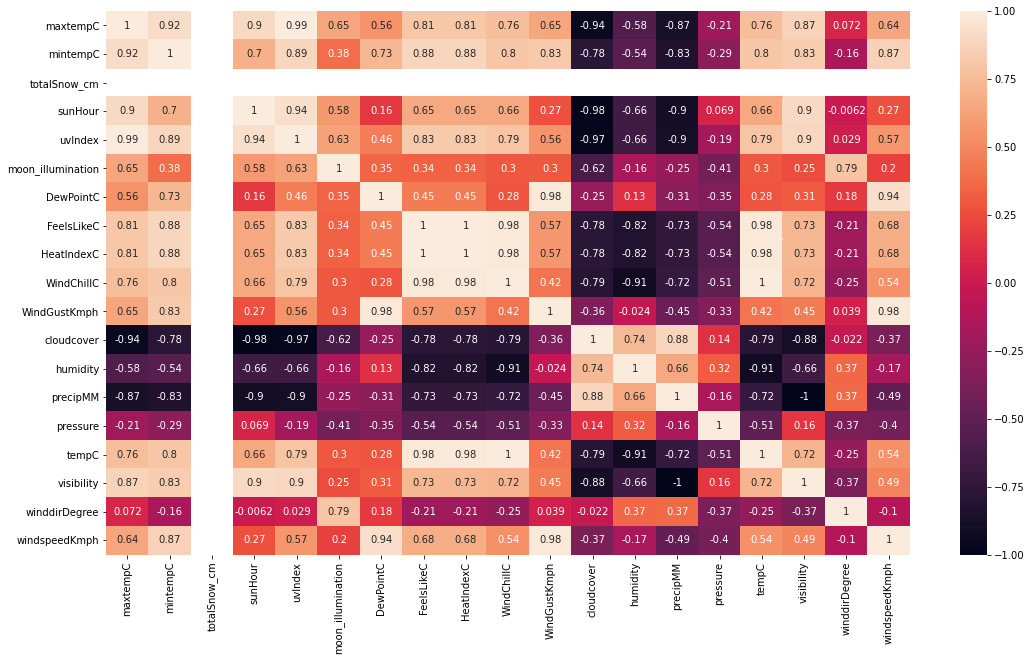

In [26]:
plt.figure(figsize = (18, 10))

sns.heatmap(df.sample(5).corr(), annot = True)

<AxesSubplot:>

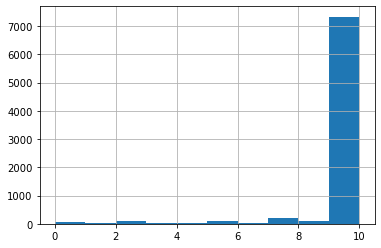

In [28]:
df.visibility.hist()